In [1]:
import sys
sys.executable
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [6]:
class_names=['tshirt/top','Trouser','pullover','dress','coat','sandal',
            'shirt','sneaker','bag','ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

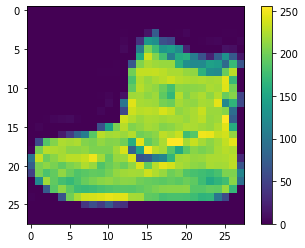

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
#feature scaling (0 to 1)
train_images=train_images/255.0
test_images=test_images/255.0

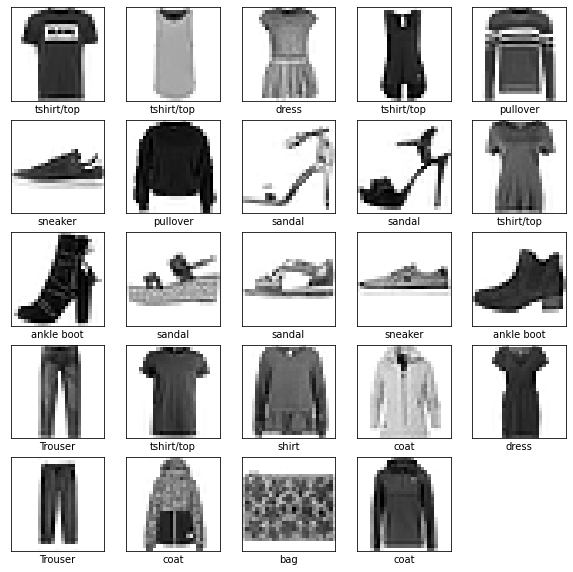

In [23]:
#display first 25 images from the training set and diplay class name below each image
plt.figure(figsize=(10,10))
for i in range(1,25,1):
    plt.subplot(5,5,i)         #5 rows,5 col,ith position
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
#building neural network model
#configuring layers of the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),         #pixels are flattened from 2d to 1d
    keras.layers.Dense(128,activation=tf.nn.relu),      #128nodes
    keras.layers.Dense(10,activation=tf.nn.softmax)     #10 nodes
])

In [31]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
#train the model
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 32s 534us/sample - loss: 0.2788 - accuracy: 0.8968
Epoch 2/5
60000/60000 [==============================] - 31s 524us/sample - loss: 0.2670 - accuracy: 0.9002
Epoch 3/5
60000/60000 [==============================] - 31s 522us/sample - loss: 0.2547 - accuracy: 0.9048
Epoch 4/5
60000/60000 [==============================] - 32s 530us/sample - loss: 0.2469 - accuracy: 0.9078- loss: 0
Epoch 5/5
60000/60000 [==============================] - 31s 525us/sample - loss: 0.2363 - accuracy: 0.9113


In [35]:
#testing model performance on test dataset
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('test accuracy:',test_acc)

10000/10000 [==============================] - 6s 646us/sample - loss: 0.3796 - accuracy: 0.8658
test accuracy: 0.8658


In [36]:
#prediction
predictions= model.predict(test_images)

In [37]:
predictions[0]

array([5.2224458e-10, 3.5389091e-11, 2.3216316e-10, 2.3737254e-13,
       4.3005361e-08, 1.2447902e-04, 1.3118965e-09, 1.1299662e-03,
       4.5091650e-09, 9.9874544e-01], dtype=float32)

In [38]:
np.argmax(predictions[0])

9

In [39]:
test_labels[0]

9

In [42]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label =np.argmax(predictions_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} (:2.0f)% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),color=color)
def plot_value_array(i,predictions_array,true_label):
      predictions_array,true_label=predictions_array[i],true_label[i]
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])
      thisplot= plt.bar(range(10),predictions_array,color='#777777')
      plt.ylim([0,1])
      predicted_label=np.argmax(predictions_array)
      thisplot[predicted_label].set_color('red')
      thisplot[true_label].set_color('green')

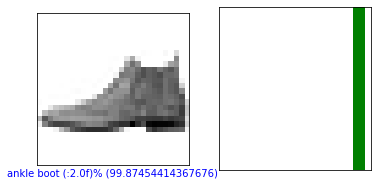

In [43]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

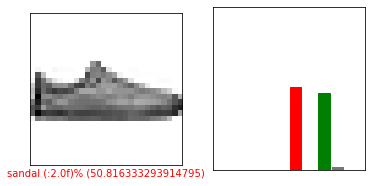

In [44]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

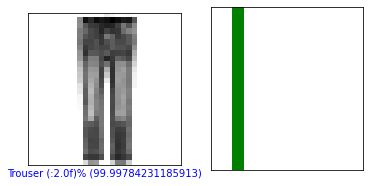

In [45]:
i=15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

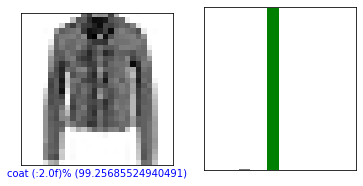

In [46]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

In [126]:
#use trained model to make prediction about a single image
#grab an image from test dataset
img=test_images[2]
print(img.shape)

(28, 28)


In [127]:
#add the image to a batch where its the only member
img=(np.expand_dims(img,0))
print(img.shape)


(1, 28, 28)


In [128]:
predictions_single= model.predict(img)
print(predictions_single)



[[1.6381533e-09 1.0000000e+00 1.1547466e-11 6.1362010e-10 4.4538838e-11
  3.9458738e-20 2.0996915e-12 7.4279698e-23 1.3565096e-14 7.1361043e-17]]


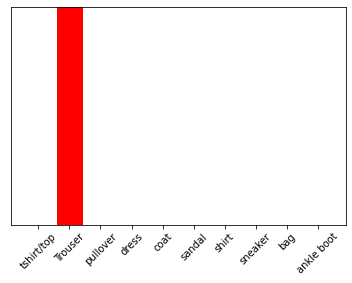

In [129]:
plot_value_array(0,predictions_single,test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)

In [130]:
np.argmax(predictions_single[0])

1